### Task : Multiple Regression
#### Input Features (Predictor Variables) : alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols
#### Output (Response Variable(s)) : flavanoids

### Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, metrics, preprocessing, model_selection, pipeline

### Collecting, Analyzing and Visualizing the data

In [2]:
data = datasets.load_wine()
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [3]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(data.data[:, :-6], columns = data.feature_names[:-6])

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alcohol            178 non-null    float64
 1   malic_acid         178 non-null    float64
 2   ash                178 non-null    float64
 3   alcalinity_of_ash  178 non-null    float64
 4   magnesium          178 non-null    float64
 5   total_phenols      178 non-null    float64
 6   flavanoids         178 non-null    float64
dtypes: float64(7)
memory usage: 9.9 KB


In [5]:
# Checking for null values

any(np.sum(df.isna()))

False

In [6]:
# Pearson Correlation Co-efficient

corr_matrix = df.corr()
corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000


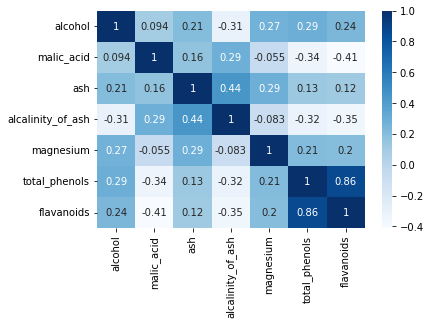

In [7]:
# Visualizing correlation matrix with a heatmap

sns.heatmap(corr_matrix, annot = True, cmap = plt.get_cmap('Blues'))
plt.show()

In [8]:
corr_matrix_ = corr_matrix['flavanoids'].sort_values(ascending = False)
corr_matrix_

flavanoids           1.000000
total_phenols        0.864564
alcohol              0.236815
magnesium            0.195784
ash                  0.115077
alcalinity_of_ash   -0.351370
malic_acid          -0.411007
Name: flavanoids, dtype: float64

In [9]:
corr_matrix['total_phenols'].sort_values(ascending = False)

total_phenols        1.000000
flavanoids           0.864564
alcohol              0.289101
magnesium            0.214401
ash                  0.128980
alcalinity_of_ash   -0.321113
malic_acid          -0.335167
Name: total_phenols, dtype: float64

In [10]:
num_attr = corr_matrix_.keys()
target = 'flavanoids'

Correlation (total_phenols vs flavanoids) : 0.8645635000951147


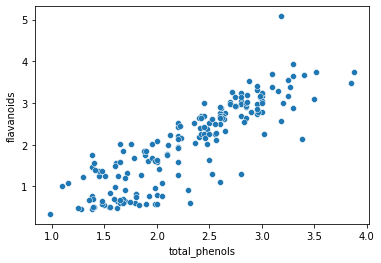

Correlation (alcohol vs flavanoids) : 0.23681492790034508


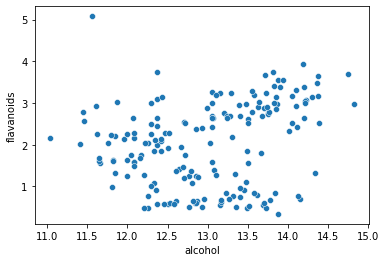

In [11]:
# Scatter Plot

for attr in num_attr[1:3]:
    sns.scatterplot(x = attr, y = target, data = df)
    print(f"Correlation ({attr} vs {target}) : {corr_matrix_[attr]}")
    plt.show()

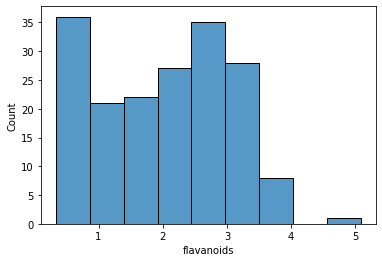

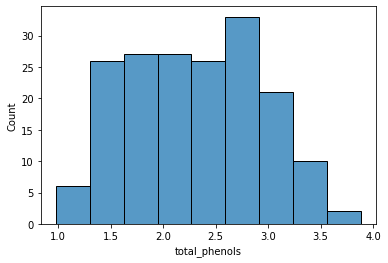

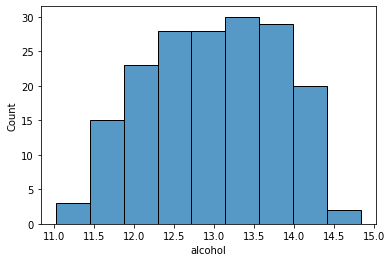

In [12]:
# Histogram

for attr in num_attr[:3]:
    sns.histplot(x = attr, data = df)
    plt.show()

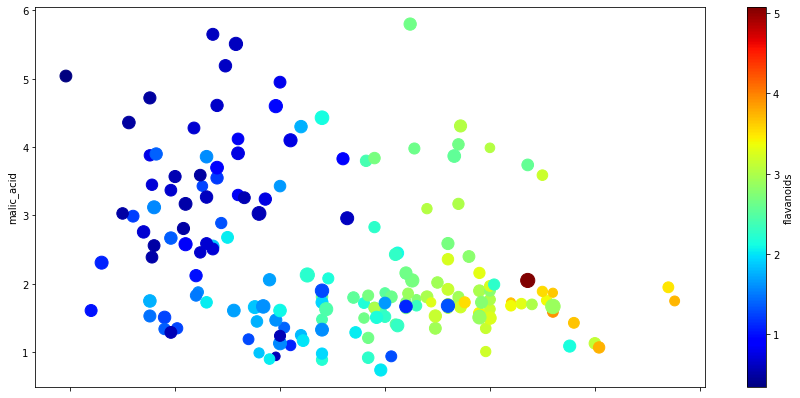

In [13]:
df.plot(kind = 'scatter', x = 'total_phenols', y = 'malic_acid', c = 'flavanoids', s = df['alcalinity_of_ash'] * 7, colorbar = True, cmap = 'jet', figsize = (15, 7))
plt.show()

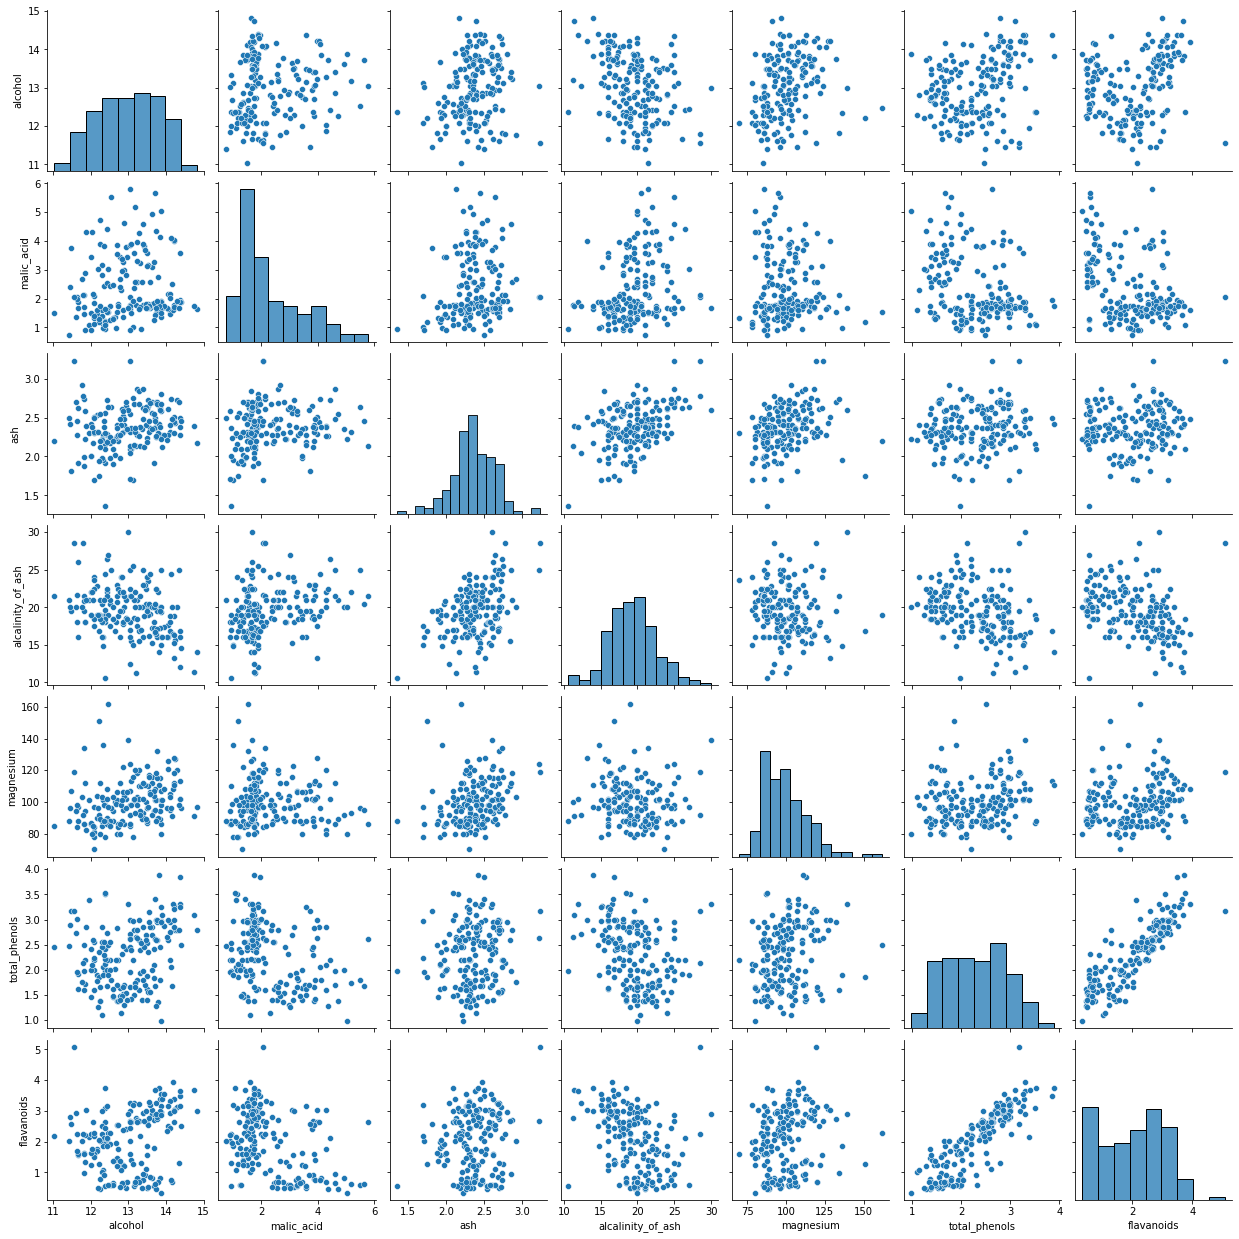

In [14]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preparation

In [15]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [16]:
# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 3)

print("Size of Train Set :", y_train.shape[0])
print("Size of Test Set :", y_test.shape[0])

Size of Train Set : 142
Size of Test Set : 36


In [17]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [18]:
# Scaling the features (Standardization)

X_train_scaled = p.fit_transform(X_train)
y_train_scaled = p.fit_transform(y_train.reshape(-1, 1))[:, 0]

X_test_scaled = p.fit_transform(X_test)
y_test_scaled = p.fit_transform(y_test.reshape(-1, 1))[:, 0]

### Training the Model and Evaluating it's Performance

In [84]:
# Implementing Linear Regression Using Batch Gradient Descent

class LinearRegression:
    
    def __init__(self, n_iter = 1000, lr = 0.0001, tol = 0.0001):
        self.n_iter = n_iter
        self.lr = lr
        self.weights = self.bias = None
        self.tol = tol
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        cost_ = 0
        for i in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            cost = (1 / n) * np.sum((y_pred - y) ** 2)
            if abs(cost - cost_) <= self.tol:
                break
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            cost_ = cost
            
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [85]:
# Training the Model

lr = LinearRegression(n_iter = 100000, lr = 0.002, tol = 1e-20)

lr.fit(X_train_scaled, y_train_scaled)

print(lr.weights, lr.bias)

[-0.02760552 -0.13751158  0.09753809 -0.10394374 -0.0134102   0.77518494] 7.771654994040524e-16


In [86]:
y_train_pred = lr.predict(X_train_scaled)

r2 = metrics.r2_score(y_train_pred, y_train_scaled)

print("Train Score :", r2)

Train Score : 0.6890506258541138


In [22]:
# Implementing Linear Regression Using Closed Form Equation (Normal Equation)

X_train_ = np.c_[np.ones(y_train_scaled.shape[0]), X_train_scaled]

X_train_

coef = np.linalg.inv((X_train_.T.dot(X_train_))).dot((X_train_.T).dot(y_train_scaled.reshape(-1, 1)))

coef = coef[1:]
intercept = coef[0]

print(coef, intercept)

[[-0.02760526]
 [-0.13751161]
 [ 0.0975377 ]
 [-0.1039433 ]
 [-0.01341018]
 [ 0.77518508]] [-0.02760526]


In [42]:
y_train_pred = np.dot(X_train_scaled, coef) + intercept

r2 = metrics.r2_score(y_train_pred, y_train_scaled)

print("Train Score :", r2)

Train Score : 0.6880516212533011


#### Sklearn Implementation

In [24]:
# Training the model

model = linear_model.LinearRegression()

model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [25]:
y_train_pred = model.predict(X_train_scaled)

r2 = metrics.r2_score(y_train_pred, y_train_scaled)

print("Train Score :", r2)

Train Score : 0.6890506308839757


### Validating the model

In [26]:
y_test_pred = model.predict(X_test_scaled)
test_score = metrics.r2_score(y_test_scaled, y_test_pred)

print("Test Score :", test_score)

Test Score : 0.8159956085528508
